# Problem 4 - CSTR with Heat Exchange

Consider a simple liquid-phase, irreversible chemical reaction, $\text{A}\to\text{B}$, that takes place in a CSTR. The schematic diagram is as follows.

![Prob4-fig1](./images/Prob4-fig1.jpg)

The goal is to derive a dynamic model that describing the exit temperature $T$ and exit concentration $c_A$ under the following assumptions:

1. The CSTR is perfectly mixed.
2. The mass densities of the feed and product streams are equal and constant, and is denoted by $\rho$.
3. The liquid volume $V$ in the reactor is kept constant by an overflow line.
4. The reaction follows a first-order rate law, $-r_A = kc_A$
5. The thermal capacitances of the coolant and the cooling coil wall are negligible compared to that of the liquid in the tank.
6. All of the coolant is at a uniform temperature, $T_c$. (The temperature gradient from the coolant and the coil wall exposed to the liquid is neglected)
7. The rate of heat transfer from the reactor contents to the coolant is given by $ Q = UA(T_c - T) $ where $U$ is the overall heat transfer coefficient and $A$ is the heat transfer area. Both of these model parameters are assumed to be constant.
8. The enthalpy change associated with the mixing of the feed and the liquid in the tank is negligible compared with the enthalpy change for the chemical reaction. In other words, the heat of mixing is negligible compared to the reaction.
9. Shaft work and heat losses to the ambient can be neglected.
10. kinetic, potential, and other energies corresponding to each stream (except the internal energy) are neglected.

Then, a simulation is to be made on the effect of a step change in coolant temperature in the positive and negative directions. The table below shows the parameters and nominal operating condition for the CSTR.

| Parameter     | Value                       | Parameter | Value                               |
| :-----------: | :-------------------------- | :-------: | :---------------------------------- |
| $q$           | $100~\text{L/min}$          | $E/R$     | $8750~\text{}$                      |
| $c_{Ai}$      | $1~\text{mol/L}$            | $k_0$     | $7.2\times 10^{10}~\text{min}^{-1}$ |
| $\tau_i$      | $350~\text{K}$              | $UA$      | $5\times 10^4~\text{J/min-K}$       |
| $V$           | $100~\text{L}$              | $T_c(0)$  | $300~\text{K}$                      |
| $\rho$        | $1000~\text{g/L}$           | $c_A(0)$  | $0.5~\text{mol/L}$                  |
| $C$           | $0.239~\text{J/g-K}$        | $T(0)$    | $350~\text{K}$                      |
| $-\Delta H_R$ | $5\times 10^4~\text{J/mol}$ | $~$       | $~$                                 |

Two cases are to be simulated, one based on increases cooling by changing $T_c$ from $300~\text{K}$ to $290~\text{K}$ and one reducing the cooling rate by increasing $T_c$ from $300~\text{K}$ to $305~\text{K}$. The model equations are to be solved over a 10-minute horizon.

# Solution Part I - Modelling

## Modelling Objectives and End Use

The liquid phase, irreversible chemical reaction $\text{A} \to \text{B}$ in a CSTR with heat exchange will be modelled under the above assumptions. This model will then be used to study the transient response of the temperature $T(t)$ and concentration $c_A(t)$ of the liquid in the tank on step changes in coolant temperature.

## Conservation Equations

### Species Balance

For each of the species and energy balances, we start with the general statement, and then derive the model equation, noting the assumptions along the way. Starting with the species balance, the general statement is

$$
\begin{equation*}
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of}~j~\text{into}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of}~j~\text{out of}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    +
    \left[
    \begin{aligned}
        &\text{Rate of generation}\\
        &\text{of}~j~\text{by chemical}\\
        &\text{reaction within}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
    =
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{accumulation}\\
        &\text{of}~j~\text{within}\\
        &\text{the system}\\
        &\text{(moles/time)}
    \end{aligned}
    \right]
\end{equation*}
$$

In mathematical symbols, we can write this as

$$
F_{ji} - F_{i} + G_j = \frac{dN_j}{dt}
$$

where $F_{j0},F_{j}$ are the inlet and outlet molar flowrates of species $i$, respectively; $G_j$ is the rate of generation of component $i$ within the system; and $N_j$ is the number of moles of species $j$ within the system. Due to the perfect mixing assumption, the concentration of each species $i$ within the system is equal to the outlet concentration of $j$, $c_j|_{\text{out}} = c_j|_{\text{sys}}$. Furthermore, because the system volume $V$ is constant, we have $q_{i} = q$. Combining all these, we get the species balance for species $\text{A}$ and $\text{B}$:

$$
\boxed
{
    \begin{aligned}
    V\frac{dc_j}{dt} &= q\left(c_ji - c_j\right) + \nu_j k c_A V \qquad (j=\text{A, B})\\
    k &= k_0e^{-E/RT}
    \end{aligned}
}
\tag{1}
$$

### Energy Balance

The general statement is

$$
\begin{equation*}
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{accumulation}\\
        &\text{of energy}\\
        &\text{within the}\\
        &\text{system}
    \end{aligned}
    \right]
    =
    \left[
    \begin{aligned}
        &\text{Rate of flow}\\
        &\text{of heat to}\\
        &\text{the system}\\
        &\text{from the}\\
        &\text{surroundings}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of work}\\
        &\text{of done by}\\
        &\text{the system}\\
        &\text{on the}\\
        &\text{surroundings}
    \end{aligned}
    \right]
    +
    \left[
    \begin{aligned}
        &\text{Rate of energy}\\
        &\text{added to the}\\
        &\text{system by mass}\\
        &\text{flow into the}\\
        &\text{system}
    \end{aligned}
    \right]
    -
    \left[
    \begin{aligned}
        &\text{Rate of}\\
        &\text{energy leaving}\\
        &\text{the system by mass}\\
        &\text{flow out of the}\\
        &\text{system}
    \end{aligned}
    \right]
\end{equation*}
$$

which in mathematical symbols could be written as

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} - \dot{W} + \left.\sum_{i}{E_iF_i}\right\rvert_{\text{in}} - \left.\sum_{i}{E_iF_i}\right\rvert_{\text{out}}
$$

where $\hat{E}_{\text{sys}}$ is the total energy of the system, and $E_i$ is the specific energy carried by species $i$. 

#### The Work Term

The work term $\dot{W}$ can be divided into two terms: flow work, and shaft work. Flow work is the work necessary to get the mass into and out of the system; shaft work is the work by the system coming from equipments such as turbines and stirrers.

$$
\dot{W} = \underbrace{-\left.\sum_{i}{F_iP\tilde{V_i}}\right\rvert_{\text{in}} + \left.\sum_{i}{F_iP\tilde{V_i}}\right\rvert_{\text{out}}}_{\text{flow work}} + \underbrace{W_s}_{\text{shaft work}}
$$

here, $\tilde{V_i}$ is the specific molar volume of species $i$; and since shaftwork is neglected, the last term is cancelled out. Hence, the energy balance simplifies to

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} + \left.\sum_{i}{F_i\left(E_i + P\tilde{V_i}\right)}\right\rvert_{\text{in}} - \left.\sum_{i}{F_i\left(E_i + P\tilde{V_i}\right)}\right\rvert_{\text{out}}
$$

#### The Energy Term

The energy term $E_i$ is a combination of the internal energy $U_i$, kinetic energy, potential energy, and other energies such as electric and magnetic. It can be expressed as

$$
E_i \equiv U_i + \frac{u_i^2}{2} + gz_i + \text{other}
$$

By the last assumption made, this simplifies to

$$
E_i = U_i
$$

Furthermore, we have the relation $H_i \equiv U_i + PV_i$. Combining all these, our energy balance becomes

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \dot{Q} + \left.\sum_{i}{F_iH_i}\right\rvert_{\text{in}} - \left.\sum_{i}{F_iH_i}\right\rvert_{\text{out}}
$$

#### System Energy

To dissect the system energy $\hat{E}_{\text{sys}}$, we note that it is the sum of the products of the specific energies of the species and the number of moles; that is, we have

$$
\begin{aligned}
    \hat{E}_{\text{sys}} 
    &= \sum_{i}{\left(H_i-P\tilde{V}_i\right)N_i}\\
    &= \sum_{i}{H_iN_i} - P\sum_{i}{\tilde{V}_iN_i}\\
    &= \sum_{i}{H_iN_i} - PV
\end{aligned}
$$

Often this $PV$ term is virtually smaller than the other terms, and thus wil be neglected for this problem. Taking the time derivative of $\hat{E}_{\text{sys}}$, we get

$$
\begin{aligned}
    \frac{d\hat{E}_{\text{sys}}}{dt} 
    &= \frac{d}{dt}\left(\sum_{i}{H_iN_i}\right)\\
    &= \sum_{i}{H_i\frac{dN_i}{dt}} + \sum_{i}{N_i\frac{dH_i}{dt}}\\
    &= \sum_{i}{H_i\frac{dN_i}{dt}} + \sum_{i}{N_i\frac{dH_i}{dt}}
\end{aligned}
$$

But we know that

$$
\frac{dN_i}{dt} = F_i|_{\text{in}}-F_i|_{\text{out}}-\nu_ir_AV,
$$

and that the temperature dependence of enthalpy $H_i(T)$ can be defined by the formula 

$$
H_i(T) \equiv H_i^\circ(T_R) + \int_{T_R}^{T}{C_p}~dT
$$

which by the constant heat capacity assumption simplifies to

$$
H_i(T) = H_i^\circ(T_R) + C_i\left(T - T_R\right).
$$

Thus, the expression for the time derivative simplifies to

$$
\frac{d\hat{E}_{\text{sys}}}{dt} = \sum_{i}{H_iF_i|_{\text{in}}}-\sum_{i}{H_iF_i|_{\text{out}}} - \left(-r_A\right)V\left(-\Delta H_R\right) + \rho V C\frac{dT}{dt}
$$

where $-\Delta H_R \equiv \sum_{i}{\nu_iH_i}$ is the heats of reaction, and $\rho V C \equiv \sum_{i}{N_iC_i}$ is the system's thermal capacitance. Substituting this expression for $d\hat{E}_{\text{sys}}/dt$ in the energy balance, we get

$$
\rho V C\frac{dT}{dt} = \dot{Q} + wC(T|_{\text{in}}-T) - wC(T|_{\text{out}}-T) + \left(-r_A\right)V\left(-\Delta H_R\right)
$$

where $\rho qC \equiv \sum_{i}{F_iC_i}$ is the inlet (and outlet) thermal capacitance. Now, because there is perfect mixing, $T|_{\text{out}}=T$; so we can further simplify this to

$$
\boxed{\rho V C\frac{dT}{dt} = UA(T_c - T) + \rho qC(Ti-T) + kVc_A\left(-\Delta H_R\right)}
$$

where we have applied the assumption that $\dot{Q} = UA(T_c-T)$, and that $-r_A = kc_A$. This is the simplest form of the energy balance.

## Degrees of Freedom Analysis

|              |                                      |
| :----------- | :----------------------------------: |
| 6 parameters | $k_0, E/R, \rho, C, -\Delta H_R, UA$ |
| 2 equations  | eqns. $(1)-(2)$                      |
| 7 variables  | $V, c_A, c_{Ai}, q, T, T_c, T_i$     |

Thus, there are 5 degrees of freedom $\left(N_F = 5\right)$.

|                       |                  |
| :-------------------- | :--------------: |
| 2 outputs             | $c_A, T$         |
| 3 distrubance inputs  | $c_{Ai}, T_i, q$ |
| 2 manipulated inputs  | $V, T_c$         |

# Solution Part II - Simulation

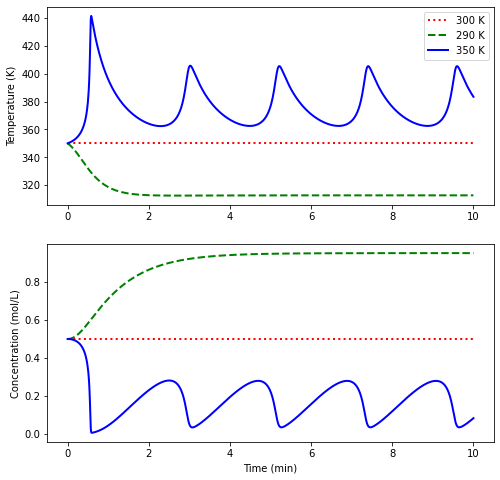

In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt

# Define parameters
k0 = 7.2e+10 #Pre-exponential factor for the Arrhenious equation (1/min)
E_R = 8750 #Activation energy divided by the universal gas constant
p = 1000 #Liquid density (g/L)
C = 0.239 #Liquid heat capacity (J/g-K)
Hrxn = 5.0e+4 #Negative of the heat of reaction (J/mol)
UA = 5.0e+4 #Overall heat transfer coefficient times the heat transfer surface area (J/min-K)

# Define system of differential equations
def dydt(y, t, Tc, Ti, cai, q, V):
    """
    Return the value of dydt at time t. Here, is the response vector y=[y1,y2] with y1 = cA(t), y2 = T(t).

    Inputs:
    cai - Inlet concentration of A (mol/L)
    q - Outlet (and inlet) flowrate (L/m)
    V - Volume of liquid in the CSTR (L)
    Tc - Temperature of the coolant (K)
    Ti - Inlet temperature (K)
    """

    y1, y2 = y
    dy1dt = (q/V)*(cai - y1) - k0*y1*np.exp(-E_R/y2)
    dy2dt = (UA/(p*V*C))*(Tc - y2) + (q/V)*(Ti - y2) + ((k0*Hrxn)/(p*C))*y1*np.exp(-E_R/y2)
    return dy1dt, dy2dt

# Define operating conditions (initial conditions)
ca0, T0, Tc0, cai0, q0, V0 = 0.5, 350, 300, 1, 100, 100
Ti0 = T0 + (-(UA/(p*V0*C))*(Tc0 - T0) - ((k0*Hrxn)/(p*C))*ca0*np.exp(-E_R/T0))/(q0/V0)

# Time gird
t = np.linspace(0, 10, 1000)

#Integrate differential equations
y0 = ca0, T0
Tc1, Tc2 = 290, 305
y11, y12 = odeint(dydt, y0, t, args=(Tc1, Ti0, cai0, q0, V0)).T
y21, y22 = odeint(dydt, y0, t, args=(Tc2, Ti0, cai0, q0, V0)).T

#Temperature vs time plot
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (8,8))
axes[0].plot(t, np.ones(len(t))*T0,'r:', linewidth=2, label="300 K")
axes[0].plot(t, y12,'g--', linewidth=2, label="290 K")
axes[0].plot(t, y22,'b-', linewidth=2, label="350 K")
axes[0].set_ylabel('Temperature (K)')
axes[0].legend()

axes[1].plot(t, np.ones(len(t))*ca0, 'r:', linewidth=2, label="300 K")
axes[1].plot(t, y11, 'g--', linewidth=2, label="290 K")
axes[1].plot(t, y21, 'b-', linewidth=2, label="305 K")
axes[1].set_ylabel('Concentration (mol/L)')
axes[1].set_xlabel('Time (min)')
plt.show()
